<h1><center>ML Modeling</center></h1>
<hr>

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV

from sklearn.naive_bayes  import GaussianNB, MultinomialNB
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier
from sklearn.calibration  import CalibratedClassifierCV
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
data  = pd.read_csv('./heart_failure_final.csv')
label = data['DEATH_EVENT']
data1 = data.drop(labels=['DEATH_EVENT'], axis=1)
data1.head()

,sex,anaemia,high_blood_pressure,smoking,diabetes,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin,serum_creatinine_bin,serum_sodium_bin
0,1,0,1,0,0,4,3,0,3,5,2
1,1,0,0,0,0,2,7,1,3,2,3
2,1,0,0,1,0,3,1,0,1,3,1
3,1,1,0,0,0,2,1,0,2,5,3
4,0,1,0,0,1,3,1,0,4,6,0


In [3]:
#train test splitting of data

x_tr, x_te, y_tr, y_te = train_test_split(data1, label, test_size=0.10, stratify=label, random_state=47)
x_tr, x_cv, y_tr, y_cv = train_test_split(x_tr, y_tr, test_size=0.10, stratify=y_tr, random_state=47)

In [4]:
print("Train Data : {0}".format(x_tr.shape))
print("CV    Data : {0}".format(x_cv.shape))
print("Test  Data : {0}".format(x_te.shape))

Train Data : (242, 11)
CV    Data : (27, 11)
Test  Data : (30, 11)


In [5]:
#standardizing the data : mean = 0 and getting the std. deviation
std = StandardScaler()
std.fit(x_tr)
norm_x_tr = std.transform(x_tr)
norm_x_cv = std.transform(x_cv)
norm_x_te = std.transform(x_te)

# [1] TSNE Visualization

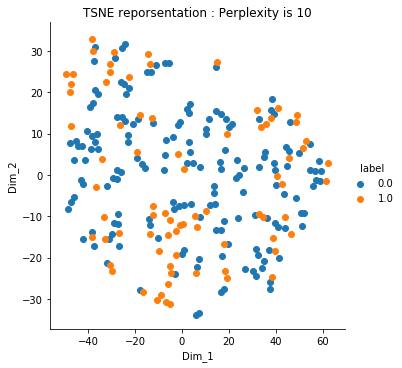

In [6]:
model = TSNE(n_components=2, random_state=54, perplexity=10, n_iter=2000)
tsne_data = model.fit_transform(norm_x_tr)
tsne_data = np.vstack((tsne_data.T, y_tr)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE reporsentation : Perplexity is 10")
plt.show()

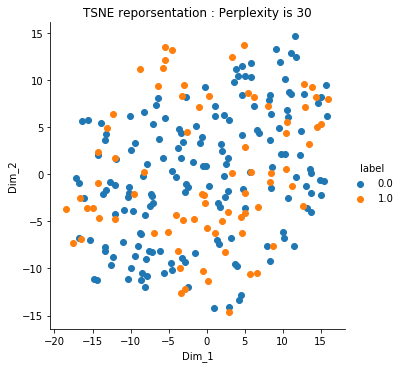

In [7]:
model = TSNE(n_components=2, random_state=54, perplexity=30, n_iter=2000)
tsne_data = model.fit_transform(norm_x_tr)
tsne_data = np.vstack((tsne_data.T, y_tr)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE reporsentation : Perplexity is 30")
plt.show()

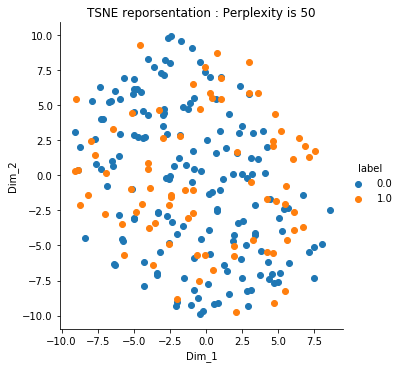

In [8]:
model = TSNE(n_components=2, random_state=54, perplexity=50, n_iter=2000)
tsne_data = model.fit_transform(norm_x_tr)
tsne_data = np.vstack((tsne_data.T, y_tr)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE reporsentation : Perplexity is 50")
plt.show()

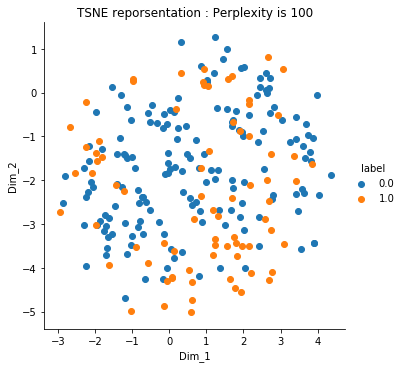

In [9]:
model = TSNE(n_components=2, random_state=54, perplexity=100, n_iter=2000)
tsne_data = model.fit_transform(norm_x_tr)
tsne_data = np.vstack((tsne_data.T, y_tr)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE reporsentation : Perplexity is 100")
plt.show()

<p>Slight randomness is seen in the reduced representation of the data for lower perplexity value in TSNE, but the same is found to be linearly separable as we increase perplexity for TSNE modeling. </p>

# [2] Modeling

In [10]:
def plot_confusion_matrix(actual, predicted):
    """
    for plotting confusion matrix for predicted and actual class labels
    """
    C = confusion_matrix(actual, predicted) #confusion matrix
    A = ((C.T)/(C.sum(axis=1))).T           #recall matrix    (row sum=1)
    B = (C/C.sum(axis=0))                   #precision matrix (col sum=1)
    plt.figure(figsize=(18, 5))
    labels = list(range(2))
    
    ax1=plt.subplot(131)
    #print('-'*10, 'Confusion Matrix', '-'*10)
    #plt.figure(figsize=(5, 4))
    sns.heatmap(C, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=ax1)
    ax1.set_title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    
    ax2=plt.subplot(132)
    #print('-'*10, 'Precision Matrix (ColSum=1)', '-'*10)#B
    #plt.figure(figsize=(5, 4))
    sns.heatmap(B, annot=True, cmap='YlGn', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=ax2)
    ax2.set_title('Precision Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    
    ax3=plt.subplot(133)
    #print('-'*10, 'Recall Matrix (RowSum=1)', '-'*10)#A
    #plt.figure(figsize=(5, 4))
    sns.heatmap(A, annot=True, cmap='YlOrBr', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=ax3)
    ax3.set_title('Recall Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

In [11]:
model_performances = dict()

#hyper_parameters
knn_neighbors = [ x for x in range(1, 50) if ((x%2!= 0)and (x%3!=0)) ]
#knn_neighbors = [5, 11, 15, 21, 31, 41, 51, 99]
print("Neighbors list     : ", knn_neighbors)

alpha_range = [ 10**i for i in range(-6, 4) ]
print("Alpha Range list   : ", alpha_range)

base_trees = [ 20, 50, 100, 200, 400, 600, 800, 1000 ]
print("Base Tree Learners : ", base_trees)

weight_0 = len([ x for x in label if x==0 ])/data.shape[0]
weight_1 = len([ x for x in label if x==1 ])/data.shape[0]

Neighbors list     :  [1, 5, 7, 11, 13, 17, 19, 23, 25, 29, 31, 35, 37, 41, 43, 47, 49]
Alpha Range list   :  [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Base Tree Learners :  [20, 50, 100, 200, 400, 600, 800, 1000]


## [2.1] Random Model

CV Accuracy :  62.963 :: CV f1-score :  58.3333
Test Accuracy :  50.0 :: Test f1-score :  34.7826


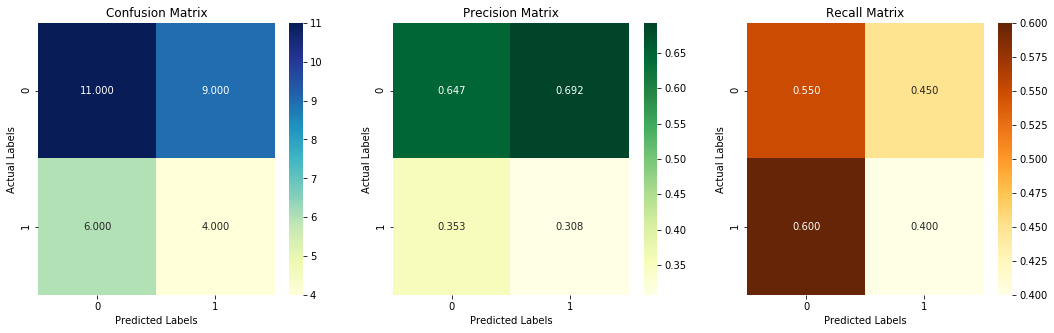

In [12]:
cv_data_len = norm_x_cv.shape[0]
te_data_len = norm_x_te.shape[0]

#Random Model : cross validation dataset analysis
cv_prediction = np.zeros((cv_data_len))
for i in range(cv_data_len):
    r_prob = np.random.rand(2)
    cv_prediction[i] = np.argmax(r_prob/sum(r_prob))
cv_accuracy = accuracy_score(y_cv, cv_prediction)
cv_f1_score = f1_score(y_cv, cv_prediction)
print("CV Accuracy : ", round(cv_accuracy*100, 4), "::", "CV f1-score : ", round(cv_f1_score*100, 4))


#Random Model : test dataset analysis 
te_prediction = np.zeros((te_data_len))
for i in range(te_data_len):
    r_prob = np.random.rand(2)
    te_prediction[i] = np.argmax(r_prob/sum(r_prob))
te_accuracy = accuracy_score(y_te, te_prediction)
te_f1_score = f1_score(y_te, te_prediction)
print("Test Accuracy : ", round(te_accuracy*100, 4), "::", "Test f1-score : ", round(te_f1_score*100, 4))

model_performances['Random Model'] = ['NA', 'NA', cv_accuracy, cv_f1_score, te_accuracy, te_f1_score]

plot_confusion_matrix(y_te, te_prediction)

## [2.2] Naive Bayes

#### [2.2.1] Without Class Prior

For Alpha= 1e-06, f1-score was found to be 0.5333 %
For Alpha= 1e-05, f1-score was found to be 0.5333 %
For Alpha=0.0001, f1-score was found to be 0.5333 %
For Alpha= 0.001, f1-score was found to be 0.5333 %
For Alpha=  0.01, f1-score was found to be 0.5333 %
For Alpha=   0.1, f1-score was found to be 0.5333 %
For Alpha=     1, f1-score was found to be 0.5333 %
For Alpha=    10, f1-score was found to be 0.5333 %
For Alpha=   100, f1-score was found to be 0.3636 %
For Alpha=  1000, f1-score was found to be    0.0 %


Best Accuracy was found to be for Alpha=1e-06, with model f1-score to be 0.5333
Model performance on Test data found to be   70.0% 




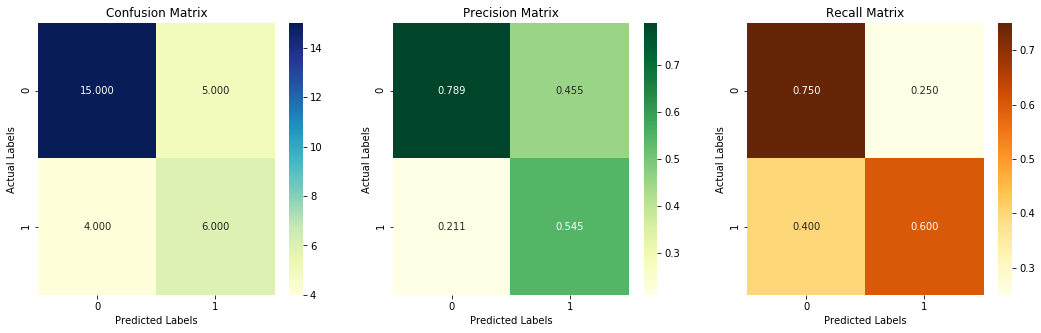

In [13]:
cv_accuracy = list()
for alpha in alpha_range:
    nb_clf = MultinomialNB(alpha=alpha)
    nb_clf.fit(x_tr, y_tr)
    #cv prediction
    cv_prediction = nb_clf.predict(x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
    cv_accuracy.append(cv_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6} %".format(alpha, cv_f1_score))

best_alpha = alpha_range[np.argmax(cv_accuracy)]
print("\n\nBest Accuracy was found to be for Alpha={0}, with model f1-score to be {1}"\
      .format(best_alpha, max(cv_accuracy)))

#training with best alpha
nb_clf = MultinomialNB(alpha=best_alpha)
nb_clf.fit(x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, nb_clf.predict(x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, nb_clf.predict(x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, nb_clf.predict(x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, nb_clf.predict(x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, nb_clf.predict(x_te)), 4)
te_accuracy = round(accuracy_score(y_te, nb_clf.predict(x_te))*100, 4)

model_performances['Naive Bayes(w/o ClassPriors)'] = [tr_f1_score, tr_accuracy, \
                                                     cv_f1_score, cv_accuracy, \
                                                     te_f1_score, te_accuracy]
print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, nb_clf.predict(x_te))

##### Naive Bayes : Feature Importance

In [14]:
col  = list(data1.columns)
wght = list(nb_clf.coef_)[0]
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 8)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin             -1.55796122
Feature ::: age_bin                          -1.70401469
Feature ::: serum_sodium_bin                 -1.90423746
Feature ::: platelates_bin                   -1.90917574
Feature ::: creatinine_phosphokinase_bin     -1.97041936
Feature ::: ejection_fraction_bin            -3.19209173
Feature ::: sex                              -3.32562312
Feature ::: anaemia                          -3.63392447
Feature ::: diabetes                         -3.69108289
Feature ::: high_blood_pressure              -3.75170751
Feature ::: smoking                          -3.95934686


#### [2.2.2] With Class Prior

For Alpha= 1e-06, f1-score was found to be 0.5926
For Alpha= 1e-05, f1-score was found to be 0.5926
For Alpha=0.0001, f1-score was found to be 0.5926
For Alpha= 0.001, f1-score was found to be 0.5926
For Alpha=  0.01, f1-score was found to be 0.5926
For Alpha=   0.1, f1-score was found to be 0.5926
For Alpha=     1, f1-score was found to be 0.5926
For Alpha=    10, f1-score was found to be 0.5385
For Alpha=   100, f1-score was found to be 0.6087
For Alpha=  1000, f1-score was found to be 0.4828


Best f1-score was found to be for Alpha=100, with value to be 0.6087
Model performance on Test data found to be   60.0% 




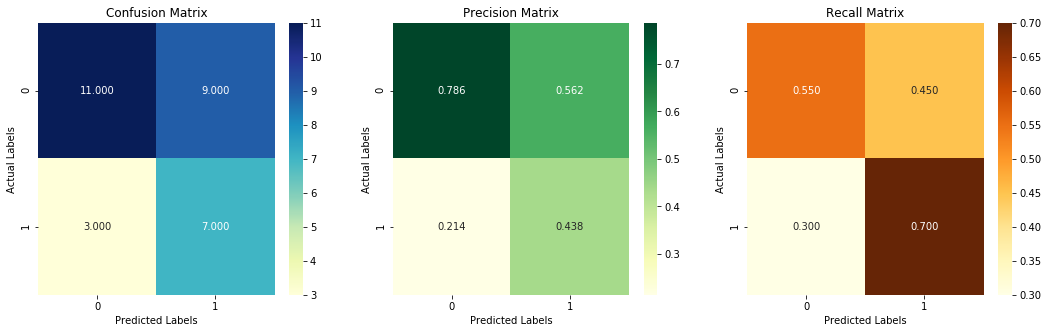

In [15]:
cv_accuracy = list()
for alpha in alpha_range:
    nb_clf = MultinomialNB(alpha=alpha, class_prior=[weight_1, weight_0])
    nb_clf.fit(x_tr, y_tr)
    #cv prediction
    cv_prediction = nb_clf.predict(x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
    cv_accuracy.append(cv_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6}".format(alpha, cv_f1_score))

best_alpha = alpha_range[np.argmax(cv_accuracy)]
print("\n\nBest f1-score was found to be for Alpha={0}, with value to be {1}"\
      .format(best_alpha, max(cv_accuracy)))

#training with best alpha
nb_clf = MultinomialNB(alpha=best_alpha, class_prior=[weight_1, weight_0])
nb_clf.fit(x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, nb_clf.predict(x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, nb_clf.predict(x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, nb_clf.predict(x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, nb_clf.predict(x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, nb_clf.predict(x_te)), 4)
te_accuracy = round(accuracy_score(y_te, nb_clf.predict(x_te))*100, 4)

model_performances['Naive Bayes(with ClassPriors)'] = [tr_f1_score, tr_accuracy, \
                                                       cv_f1_score, cv_accuracy, \
                                                       te_f1_score, te_accuracy]
print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, nb_clf.predict(x_te))

##### Naive Bayes : Feature Importance

In [16]:
col  = list(data1.columns)
wght = list(nb_clf.coef_)[0]
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 8)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin             -1.85071071
Feature ::: age_bin                          -1.95693292
Feature ::: serum_sodium_bin                 -2.09540259
Feature ::: platelates_bin                   -2.09870838
Feature ::: creatinine_phosphokinase_bin     -2.13925448
Feature ::: ejection_fraction_bin            -2.75927939
Feature ::: sex                              -2.80518909
Feature ::: anaemia                          -2.89648051
Feature ::: diabetes                         -2.9112956
Feature ::: high_blood_pressure              -2.92633348
Feature ::: smoking                          -2.97285349


## [2.3] K-Nearest Neighbors

For K=  1, f1-score was found to be 0.3529
For K=  5, f1-score was found to be 0.3077
For K=  7, f1-score was found to be 0.3333
For K= 11, f1-score was found to be 0.3333
For K= 13, f1-score was found to be 0.3636
For K= 17, f1-score was found to be 0.3333
For K= 19, f1-score was found to be 0.3636
For K= 23, f1-score was found to be 0.3636
For K= 25, f1-score was found to be 0.3636
For K= 29, f1-score was found to be    0.2
For K= 31, f1-score was found to be    0.2
For K= 35, f1-score was found to be    0.2
For K= 37, f1-score was found to be    0.2
For K= 41, f1-score was found to be    0.2
For K= 43, f1-score was found to be    0.2
For K= 47, f1-score was found to be    0.2
For K= 49, f1-score was found to be    0.2


Best f1-score was found to be for K=13, with value to be 0.3636
Model performance on Test data found to be 63.3333% 




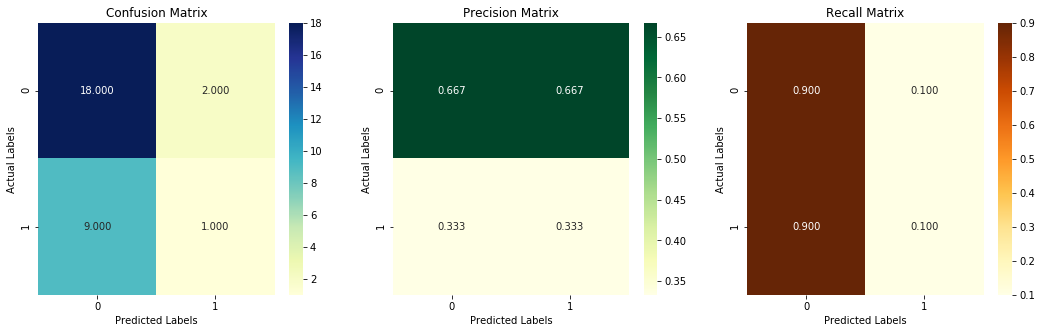

In [17]:
tr_accuracy = list()
cv_accuracy = list()
for neighbor in knn_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, n_jobs=-1)
    knn_clf.fit(norm_x_tr, y_tr)
    #cv prediction
    cv_prediction = knn_clf.predict(norm_x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
    cv_accuracy.append(cv_f1_score)
    print("For K={:3}, f1-score was found to be {:6}".format(neighbor, cv_f1_score) )

best_neighbor = knn_neighbors[np.argmax(cv_accuracy)]
#best_neighbor = 31
print("\n\nBest f1-score was found to be for K={0}, with value to be {1}"\
      .format(best_neighbor, max(cv_accuracy)))


knn_clf = KNeighborsClassifier(n_neighbors=best_neighbor)
knn_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, knn_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, knn_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, knn_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, knn_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, knn_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, knn_clf.predict(norm_x_te))*100, 4)

model_performances['K-NN Classifier'] = [tr_f1_score, tr_accuracy, \
                                         cv_f1_score, cv_accuracy, \
                                         te_f1_score, te_accuracy]

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))
plot_confusion_matrix(y_te, knn_clf.predict(norm_x_te))

## [2.4] Logistic Regression

#### [2.4.1] without Class Balancing

For Alpha= 1e-06, f1-score was found to be 0.5833
For Alpha= 1e-05, f1-score was found to be 0.5882
For Alpha=0.0001, f1-score was found to be    0.7
For Alpha= 0.001, f1-score was found to be    0.5
For Alpha=  0.01, f1-score was found to be 0.4286
For Alpha=   0.1, f1-score was found to be 0.3636
For Alpha=     1, f1-score was found to be    0.2
For Alpha=    10, f1-score was found to be 0.5143
For Alpha=   100, f1-score was found to be    0.5
For Alpha=  1000, f1-score was found to be    0.5


Best f1-score was found to be for Alpha=0.0001, with value to be 0.7
Model performance on Test data found to be 76.6667% 




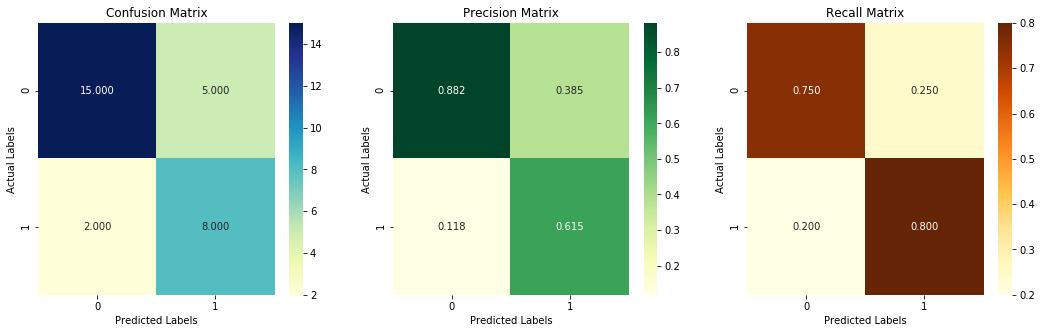

In [18]:
tr_accuracy = list()
cv_accuracy = list()
for alpha in alpha_range:
    lr_clf = SGDClassifier(loss='log', penalty='l2', alpha=alpha, random_state=27)
    lr_clf.fit(norm_x_tr, y_tr)
    #cv prediction
    cv_prediction = lr_clf.predict(norm_x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
    cv_accuracy.append(cv_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6}".format(alpha, cv_f1_score))

best_alpha = alpha_range[np.argmax(cv_accuracy)]
#best_alpha = 1
print("\n\nBest f1-score was found to be for Alpha={0}, with value to be {1}"\
      .format(best_alpha, max(cv_accuracy)))


lr_clf = SGDClassifier(loss='log', penalty='l2', alpha=best_alpha, random_state=27)
lr_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, lr_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, lr_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, lr_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, lr_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, lr_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, lr_clf.predict(norm_x_te))*100, 4)

model_performances['Logistic Regression(w/o Class Balance)'] = [tr_f1_score, tr_accuracy, \
                                                                cv_f1_score, cv_accuracy, \
                                                                te_f1_score, te_accuracy]
print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, lr_clf.predict(norm_x_te))

##### Logistic regression : Feature Importance

In [19]:
col  = list(data1.columns)
wght = list(lr_clf.coef_)[0]
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))

Feature Importance ::: 
Feature ::: anaemia                             2.16614
Feature ::: age_bin                             1.84358
Feature ::: serum_creatinine_bin                 1.6548
Feature ::: high_blood_pressure                 0.70641
Feature ::: smoking                              0.5666
Feature ::: diabetes                            0.39195
Feature ::: serum_sodium_bin                     0.3572
Feature ::: sex                                -0.02177
Feature ::: platelates_bin                     -0.25236
Feature ::: creatinine_phosphokinase_bin       -1.57336
Feature ::: ejection_fraction_bin              -2.81706


#### [2.4.2] with Class Balancing

For Alpha= 1e-06, f1-score was found to be    0.5
For Alpha= 1e-05, f1-score was found to be    0.5
For Alpha=0.0001, f1-score was found to be 0.5263
For Alpha= 0.001, f1-score was found to be 0.6667
For Alpha=  0.01, f1-score was found to be 0.6667
For Alpha=   0.1, f1-score was found to be 0.5882
For Alpha=     1, f1-score was found to be 0.7273
For Alpha=    10, f1-score was found to be    0.5
For Alpha=   100, f1-score was found to be    0.5
For Alpha=  1000, f1-score was found to be    0.5


Best f1-score was found to be for Alpha=1, with value to be 0.7273
Model performance on Test data found to be 63.3333% 




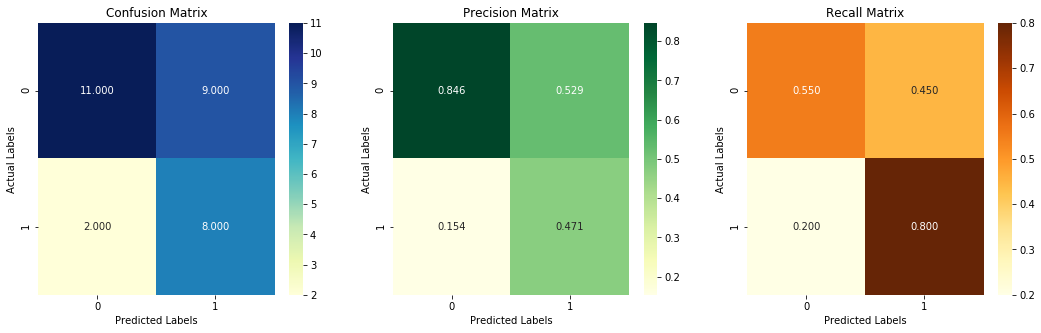

In [20]:
cv_accuracy = list()
for alpha in alpha_range:
    lr_clf = SGDClassifier(loss='log', penalty='l2', alpha=alpha, class_weight={0:weight_1, 1:weight_0}, random_state=27)
    lr_clf.fit(norm_x_tr, y_tr)
    #cv prediction
    cv_prediction = lr_clf.predict(norm_x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
    cv_accuracy.append(cv_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6}".format(alpha, cv_f1_score))

best_alpha = alpha_range[np.argmax(cv_accuracy)]
#best_alpha = 1
print("\n\nBest f1-score was found to be for Alpha={0}, with value to be {1}"\
      .format(best_alpha, max(cv_accuracy)))


lr_clf = SGDClassifier(loss='log', penalty='l2', alpha=best_alpha, class_weight={0:weight_1, 1:weight_0}, random_state=27)
lr_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, lr_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, lr_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, lr_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, lr_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, lr_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, lr_clf.predict(norm_x_te))*100, 4)

model_performances['Logistic Regression(with Class Balance)'] = [tr_f1_score, tr_accuracy, \
                                                                 cv_f1_score, cv_accuracy, \
                                                                 te_f1_score, te_accuracy]
print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, lr_clf.predict(norm_x_te))

##### Logistic regression : Feature Importance

In [21]:
col  = list(data1.columns)
wght = list(lr_clf.coef_)[0]
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin                0.07472
Feature ::: age_bin                               0.045
Feature ::: high_blood_pressure                 0.01873
Feature ::: anaemia                             0.01229
Feature ::: smoking                             0.00737
Feature ::: sex                                 0.00015
Feature ::: diabetes                              5e-05
Feature ::: platelates_bin                     -0.00074
Feature ::: creatinine_phosphokinase_bin       -0.00681
Feature ::: ejection_fraction_bin              -0.04141
Feature ::: serum_sodium_bin                   -0.04643


## [2.4] Linear SVM

#### [2.4.1] without Class Balancing

For Alpha= 1e-06, f1-score was found to be 16.6667
For Alpha= 1e-05, f1-score was found to be 55.5556
For Alpha=0.0001, f1-score was found to be 53.3333
For Alpha= 0.001, f1-score was found to be 57.1429
For Alpha=  0.01, f1-score was found to be 46.1538
For Alpha=   0.1, f1-score was found to be 33.3333
For Alpha=     1, f1-score was found to be    0.0
For Alpha=    10, f1-score was found to be   50.0
For Alpha=   100, f1-score was found to be   50.0
For Alpha=  1000, f1-score was found to be   50.0


Best f1-score was found to be for Alpha=0.001, with value to be 57.1429
Model performance on Test data found to be 76.6667% 




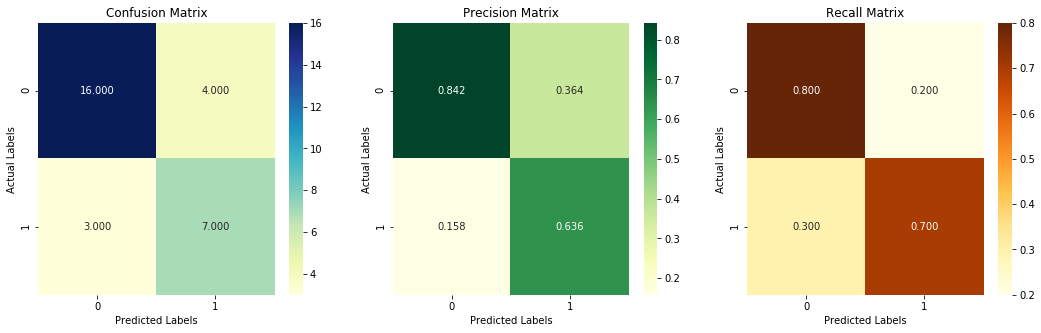

In [22]:
tr_accuracy = list()
cv_accuracy = list()
for alpha in alpha_range:
    svm_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=alpha, random_state=27)
    svm_clf.fit(norm_x_tr, y_tr)
    #cv prediction
    cv_prediction = svm_clf.predict(norm_x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction)*100, 4)
    cv_accuracy.append(cv_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6}".format(alpha, cv_f1_score))

best_alpha = alpha_range[np.argmax(cv_accuracy)]
#best_alpha = 1
print("\n\nBest f1-score was found to be for Alpha={0}, with value to be {1}"\
      .format(best_alpha, max(cv_accuracy)))


svm_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=best_alpha, random_state=27)
svm_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, svm_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, svm_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, svm_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, svm_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, svm_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, svm_clf.predict(norm_x_te))*100, 4)

model_performances['Linear SVM(w/o Class Balance)'] = [tr_f1_score, tr_accuracy, \
                                                       cv_f1_score, cv_accuracy, \
                                                       te_f1_score, te_accuracy]
print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, svm_clf.predict(norm_x_te))

##### Linear SVM : Feature Importance

In [23]:
col  = list(data1.columns)
wght = list(svm_clf.coef_)[0]
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin                0.82729
Feature ::: age_bin                             0.58758
Feature ::: high_blood_pressure                 0.49306
Feature ::: anaemia                             0.28691
Feature ::: diabetes                            0.04908
Feature ::: smoking                            -0.01722
Feature ::: creatinine_phosphokinase_bin        -0.0752
Feature ::: serum_sodium_bin                   -0.36799
Feature ::: ejection_fraction_bin              -0.41875
Feature ::: sex                                -0.44502
Feature ::: platelates_bin                     -0.56136


#### [2.4.2] with Class Balancing

For Alpha= 1e-06, f1-score was found to be   50.0
For Alpha= 1e-05, f1-score was found to be   50.0
For Alpha=0.0001, f1-score was found to be 52.6316
For Alpha= 0.001, f1-score was found to be 66.6667
For Alpha=  0.01, f1-score was found to be 66.6667
For Alpha=   0.1, f1-score was found to be 58.8235
For Alpha=     1, f1-score was found to be 72.7273
For Alpha=    10, f1-score was found to be   50.0
For Alpha=   100, f1-score was found to be   50.0
For Alpha=  1000, f1-score was found to be   50.0


Best f1-score was found to be for Alpha=1, with value to be 72.7273
Model performance on Test data found to be 63.3333% 




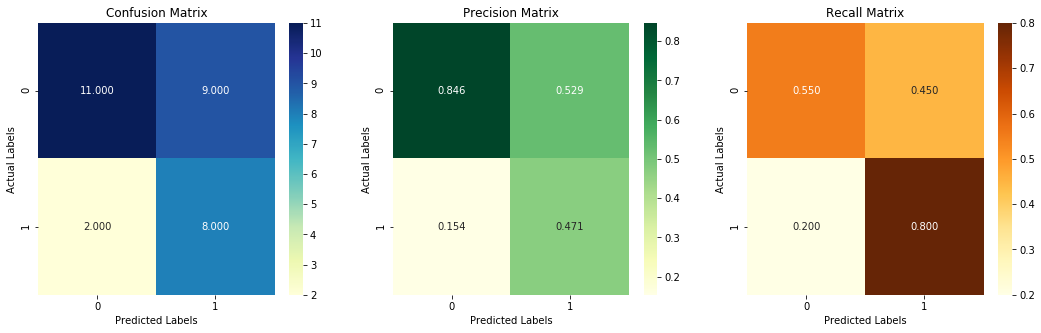

In [24]:
tr_accuracy = list()
cv_accuracy = list()
for alpha in alpha_range:
    svm_clf = SGDClassifier(loss='log', penalty='l2', alpha=alpha, class_weight={0:weight_1, 1:weight_0}, random_state=27)
    svm_clf.fit(norm_x_tr, y_tr)
    #cv prediction
    cv_prediction = svm_clf.predict(norm_x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction)*100, 4)
    cv_accuracy.append(cv_f1_score)
    print("For Alpha={:6}, f1-score was found to be {:6}".format(alpha, cv_f1_score))

best_alpha = alpha_range[np.argmax(cv_accuracy)]
#best_alpha = 1
print("\n\nBest f1-score was found to be for Alpha={0}, with value to be {1}"\
      .format(best_alpha, max(cv_accuracy)))


svm_clf = SGDClassifier(loss='log', penalty='l2', alpha=best_alpha, class_weight={0:weight_1, 1:weight_0}, random_state=27)
svm_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, svm_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, svm_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, svm_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, svm_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, svm_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, svm_clf.predict(norm_x_te))*100, 4)

model_performances['Linear SVM(with Class Balance)'] = [tr_f1_score, tr_accuracy, \
                                                        cv_f1_score, cv_accuracy, \
                                                        te_f1_score, te_accuracy]

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, svm_clf.predict(norm_x_te))

##### Linear SVM : Feature Importance

In [25]:
col  = list(data1.columns)
wght = list(svm_clf.coef_)[0]
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin                0.07472
Feature ::: age_bin                               0.045
Feature ::: high_blood_pressure                 0.01873
Feature ::: anaemia                             0.01229
Feature ::: smoking                             0.00737
Feature ::: sex                                 0.00015
Feature ::: diabetes                              5e-05
Feature ::: platelates_bin                     -0.00074
Feature ::: creatinine_phosphokinase_bin       -0.00681
Feature ::: ejection_fraction_bin              -0.04141
Feature ::: serum_sodium_bin                   -0.04643


## [2.5] Random Forest

#### [2.5.1] without Class Balancing

For 20 Base Trees : f1-score = 0.3636 with depth of 3
For 50 Base Trees : f1-score = 0.3636 with depth of 3
For 100 Base Trees : f1-score = 0.3636 with depth of 3
For 200 Base Trees : f1-score = 0.4 with depth of 10
For 400 Base Trees : f1-score = 0.3636 with depth of 3
For 600 Base Trees : f1-score = 0.3636 with depth of 3
For 800 Base Trees : f1-score = 0.4 with depth of 10
For 1000 Base Trees : f1-score = 0.4 with depth of 10


Best f1-score of 0.4 was found with 200 base trees having depth of 10.
Model performance on Test data found to be 73.3333% 




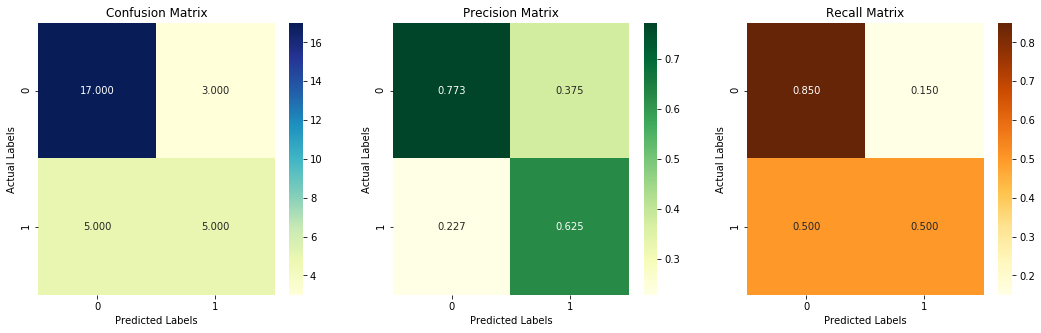

In [26]:
cv_accuracy = list()
for b_tree in base_trees:
    depth_accuracy = list()
    for dep in [1, 3, 5, 7, 10]:
        clf = RandomForestClassifier(n_estimators=b_tree, max_depth=dep, criterion='gini', random_state=45, n_jobs=-1)
        clf.fit(norm_x_tr, y_tr)
        # prediction of cv data
        #cv_prediction = [ np.argmax(x) for x in clf.predict_proba(norm_x_cv) ]
        cv_prediction = clf.predict(norm_x_cv)
        cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
        depth_accuracy.append((dep, cv_f1_score))
    index = np.argmax([ x[1] for x in depth_accuracy ])
    cv_accuracy.append(depth_accuracy[index])
    print("For {0} Base Trees : f1-score = {1} with depth of {2}"\
          .format(b_tree, depth_accuracy[index][1], depth_accuracy[index][0]))
    
index          = np.argmax([x[1] for x in cv_accuracy])
best_base_tree = base_trees[index]
best_depth     = cv_accuracy[index][0]
print("\n\nBest f1-score of {0} was found with {1} base trees having depth of {2}."\
     .format(cv_accuracy[index][1], best_base_tree, best_depth))

#fitting moodel for final time
r_clf = RandomForestClassifier(n_estimators=best_base_tree, max_depth=best_depth, \
                             criterion='gini', random_state=27, n_jobs=-1)
r_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, r_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, r_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, r_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, r_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, r_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, r_clf.predict(norm_x_te))*100, 4)

model_performances['Random Forest(w/o Class Balance)'] = [tr_f1_score, tr_accuracy, \
                                                          cv_f1_score, cv_accuracy, \
                                                          te_f1_score, te_accuracy]

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, r_clf.predict(norm_x_te))

##### Random Forest : Feature Importance

In [27]:
col  = list(data1.columns)
wght = list(r_clf.feature_importances_)
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin                0.22396
Feature ::: age_bin                             0.13791
Feature ::: serum_sodium_bin                    0.12742
Feature ::: platelates_bin                      0.11501
Feature ::: creatinine_phosphokinase_bin        0.09668
Feature ::: ejection_fraction_bin               0.08899
Feature ::: diabetes                            0.04605
Feature ::: smoking                             0.04491
Feature ::: high_blood_pressure                 0.04425
Feature ::: sex                                 0.03765
Feature ::: anaemia                             0.03718


#### [2.5.2] with Class Balancing

For 20 Base Trees : f1-score = 0.5714 with depth of 1
For 50 Base Trees : f1-score = 0.5714 with depth of 3
For 100 Base Trees : f1-score = 0.5333 with depth of 3
For 200 Base Trees : f1-score = 0.5714 with depth of 1
For 400 Base Trees : f1-score = 0.5714 with depth of 1
For 600 Base Trees : f1-score = 0.5714 with depth of 1
For 800 Base Trees : f1-score = 0.5714 with depth of 1
For 1000 Base Trees : f1-score = 0.5714 with depth of 1


Best f1-score of 0.5714 was found with 20 base trees having depth of 1.
Model performance on Test data found to be   70.0% 




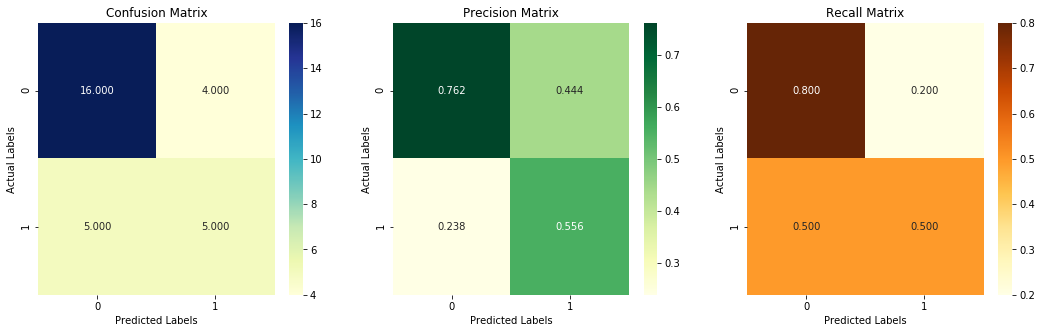

In [28]:
tr_accuracy = list()
cv_accuracy = list()

for b_tree in base_trees:
    depth_accuracy = list()
    for dep in [1, 3, 5, 7, 10]:
        clf = RandomForestClassifier(n_estimators=b_tree, max_depth=dep, criterion='gini', \
                                     class_weight={0:weight_1, 1:weight_0}, random_state=45, n_jobs=-1)
        clf.fit(norm_x_tr, y_tr)
        # prediction of cv data
        #cv_prediction = [ np.argmax(x) for x in clf.predict_proba(norm_x_cv) ]
        cv_prediction = clf.predict(norm_x_cv)
        cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
        depth_accuracy.append((dep, cv_f1_score))
    index = np.argmax([ x[1] for x in depth_accuracy ])
    cv_accuracy.append(depth_accuracy[index])
    print("For {0} Base Trees : f1-score = {1} with depth of {2}"\
          .format(b_tree, depth_accuracy[index][1], depth_accuracy[index][0]))
    
index          = np.argmax([x[1] for x in cv_accuracy])
best_base_tree = base_trees[index]
best_depth     = cv_accuracy[index][0]
print("\n\nBest f1-score of {0} was found with {1} base trees having depth of {2}."\
     .format(cv_accuracy[index][1], best_base_tree, best_depth))

#fitting moodel for final time
r_clf = RandomForestClassifier(n_estimators=best_base_tree, max_depth=best_depth, criterion='gini', \
                               class_weight={0:weight_1, 1:weight_0}, random_state=27, n_jobs=-1)
r_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, r_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, r_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, r_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, r_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, r_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, r_clf.predict(norm_x_te))*100, 4)

model_performances['Random Forest(with Class Balance)'] = [tr_f1_score, tr_accuracy, \
                                                           cv_f1_score, cv_accuracy, \
                                                           te_f1_score, te_accuracy]

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, r_clf.predict(norm_x_te))

##### Random Forest : Feature Importance

In [29]:
col  = list(data1.columns)
wght = list(r_clf.feature_importances_)
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(v, 5)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin                   0.25
Feature ::: age_bin                                 0.2
Feature ::: creatinine_phosphokinase_bin           0.15
Feature ::: ejection_fraction_bin                   0.1
Feature ::: serum_sodium_bin                        0.1
Feature ::: anaemia                                0.05
Feature ::: high_blood_pressure                    0.05
Feature ::: smoking                                0.05
Feature ::: platelates_bin                         0.05
Feature ::: sex                                     0.0
Feature ::: diabetes                                0.0


## [2.6] XGBoost 

CV f1-score of 0.3333 with 20 base trees.
CV f1-score of 0.3077 with 50 base trees.
CV f1-score of 0.5 with 100 base trees.
CV f1-score of 0.4706 with 200 base trees.
CV f1-score of 0.5556 with 400 base trees.
CV f1-score of 0.5263 with 600 base trees.
CV f1-score of 0.4444 with 800 base trees.
CV f1-score of 0.4706 with 1000 base trees.


Best f1-score was found to be for Base Tree=400, with value to be 0.5556 %
Model performance on Test data found to be 73.3333% 




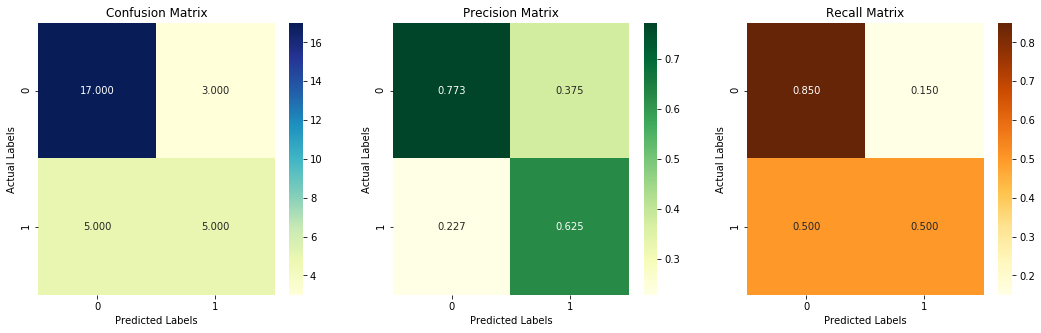

In [30]:
tr_accuracy = list()
cv_accuracy = list()

for b_tree in base_trees:
    x_clf = XGBClassifier(n_estimators=b_tree,n_jobs=4)
    x_clf.fit(norm_x_tr, y_tr)
    cv_prediction = x_clf.predict(norm_x_cv)
    cv_f1_score   = round(f1_score(y_cv, cv_prediction), 4)
    #te_prediction = round(x_cfl.score(x_te, y_te)*100, 4)
    cv_accuracy.append(cv_f1_score)
    print("CV f1-score of {0} with {1} base trees.".format(cv_f1_score, b_tree))
    
    
best_tree = base_trees[np.argmax(cv_accuracy)]
print("\n\nBest f1-score was found to be for Base Tree={0}, with value to be {1} %"\
      .format(best_tree, max(cv_accuracy)))


x_clf = XGBClassifier(n_estimators=best_tree,n_jobs=4)
x_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, x_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, x_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, x_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, x_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, x_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, x_clf.predict(norm_x_te))*100, 4)

model_performances['XGB Classifier'] = [tr_f1_score, tr_accuracy, \
                                         cv_f1_score, cv_accuracy, \
                                         te_f1_score, te_accuracy]

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, x_clf.predict(norm_x_te))

##### XGBoost : Feature Importance

In [31]:
col  = list(data1.columns)
wght = list(x_clf.feature_importances_)
print("Feature Importance ::: ")
for line in (sorted(list(zip(col, wght)), reverse=True, key=lambda x:x[1])):
    f, v = line
    print("Feature ::: {:30}   {:10}".format(f, round(float(v), 6)))

Feature Importance ::: 
Feature ::: serum_creatinine_bin               0.123244
Feature ::: age_bin                            0.108835
Feature ::: serum_sodium_bin                   0.102988
Feature ::: anaemia                            0.091993
Feature ::: smoking                            0.090113
Feature ::: diabetes                           0.088812
Feature ::: high_blood_pressure                0.086122
Feature ::: ejection_fraction_bin              0.082004
Feature ::: platelates_bin                       0.0814
Feature ::: sex                                0.079296
Feature ::: creatinine_phosphokinase_bin       0.065194


## [2.7] XGBoost : Randomized Search

{'subsample': 0.2, 'n_estimators': 600, 'max_depth': 1, 'learning_rate': 0.01, 'colsample_bytree': 0.4}
Model performance on Test data found to be 73.3333% 




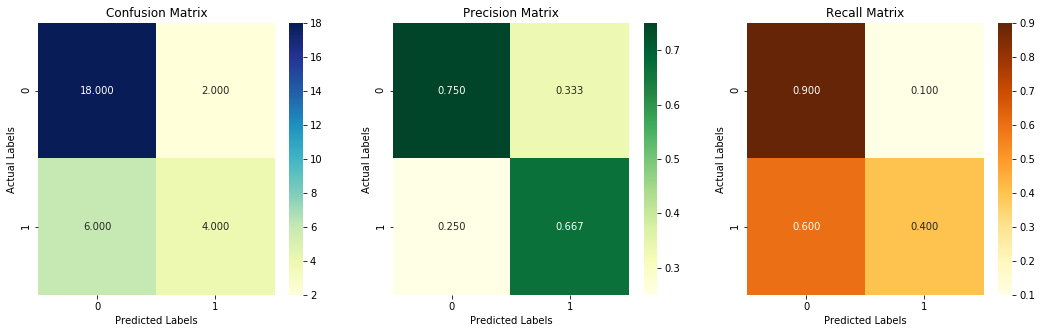

In [32]:
x_cfl=XGBClassifier(n_jobs=6)
x_cfl.fit(x_tr,y_tr)

prams={'n_estimators'    :base_trees,\
       'learning_rate'   :[0.01, 0.03, 0.05, 0.1, 0.15, 0.2],\
       'max_depth'       :[1, 2, 3, 4, 5, 6, 7],\
       'colsample_bytree':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],\
       'subsample'       :[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}

random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions=prams, n_iter=100, n_jobs=-1, random_state=47)
random_cfl1.fit(norm_x_tr,y_tr)

xgb_bytes_list = random_cfl1.best_params_
print(xgb_bytes_list)

#xgb_bytes_list = random_cfl1.best_params_
x_cfl_bytes=XGBClassifier(n_estimators     = xgb_bytes_list['n_estimators'], \
                          sumsample        = xgb_bytes_list['subsample'], \
                          max_depth        = xgb_bytes_list['max_depth'], \
                          learning_rate    = xgb_bytes_list['learning_rate'], \
                          colsample_bytree = xgb_bytes_list['colsample_bytree'], \
                          n_jobs           = 6)
x_cfl_bytes.fit(norm_x_tr,y_tr)
sig_clf = CalibratedClassifierCV(x_cfl_bytes, method="sigmoid")
sig_clf.fit(norm_x_tr, y_tr)

tr_f1_score = round(f1_score(y_tr, sig_clf.predict(norm_x_tr)), 4)
tr_accuracy = round(accuracy_score(y_tr, sig_clf.predict(norm_x_tr))*100, 4)

cv_f1_score = round(f1_score(y_cv, sig_clf.predict(norm_x_cv)), 4)
cv_accuracy = round(accuracy_score(y_cv, sig_clf.predict(norm_x_cv))*100, 4)

te_f1_score = round(f1_score(y_te, sig_clf.predict(norm_x_te)), 4)
te_accuracy = round(accuracy_score(y_te, sig_clf.predict(norm_x_te))*100, 4)

model_performances['XGBoost Randomized'] = [tr_f1_score, tr_accuracy, \
                                            cv_f1_score, cv_accuracy, \
                                            te_f1_score, te_accuracy]

print("Model performance on Test data found to be {:6}% \n\n".format(te_accuracy))

plot_confusion_matrix(y_te, sig_clf.predict(norm_x_te))

# [3] Conclusion

In [33]:
from prettytable import PrettyTable

hf = PrettyTable(['Model', 'Train f1-score', 'Train Acc', 'CV f1-score', 'CV Acc', 'Test f1-score', 'Test Acc'])

for k, v in model_performances.items():
    #print(v)
    hf.add_row([k, v[0], v[1], round(v[2], 4), round(v[3], 4), round(v[4], 4), round(v[5], 4)])

print(hf)

+-----------------------------------------+----------------+-----------+-------------+---------+---------------+----------+
|                  Model                  | Train f1-score | Train Acc | CV f1-score |  CV Acc | Test f1-score | Test Acc |
+-----------------------------------------+----------------+-----------+-------------+---------+---------------+----------+
|               Random Model              |       NA       |     NA    |    0.6296   |  0.5833 |      0.5      |  0.3478  |
|       Naive Bayes(w/o ClassPriors)      |     0.5362     |  73.5537  |    0.5333   | 74.0741 |     0.5714    |   70.0   |
|      Naive Bayes(with ClassPriors)      |     0.5686     |  63.6364  |    0.6087   | 66.6667 |     0.5385    |   60.0   |
|             K-NN Classifier             |     0.4272     |  75.6198  |    0.3636   | 74.0741 |     0.1538    | 63.3333  |
|  Logistic Regression(w/o Class Balance) |     0.5667     |  67.7686  |     0.7     | 77.7778 |     0.6957    | 76.6667  |
| Logist

<p>From TSNE representation of transformed data, where we binned continuous variables, we could see linear separation between data in lower i.e. 2 dimension. Also, we had to predict the heart failure of patient with the help of given feature value which is binary class label in nature and hence we used classification algorithms</p>
<p>As data is severly imbalances, we also used the class balancing where more weightage was given to class representing heart failure.</p>

<p>Of the above mentioned models, we checked for f1 score, which can tel us, which model was able to make better prediction in deciding the heart failure compared to just the simple accuracy. Accuracy of the models can get easily altered, as dataset is pretty imbalanced.</p>
<p>Despite of class balancing, models without class balancing tend to preform well compared to that of models with class balancing.</p>
<p>Logistic Regression model, tend to give more f1 score and also prediction of the same is also better compared to that of other models.</p>